In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
plt.rc('font',**{'size':16})

from util import get_land, coarse_grain

In [2]:
land = get_land()
modellabels = {'HiRAM': 'HiRAM-50km', 'AM2.5C180': 'AM2.5-50km', 'AM2.5C360': 'AM2.5-25km'}

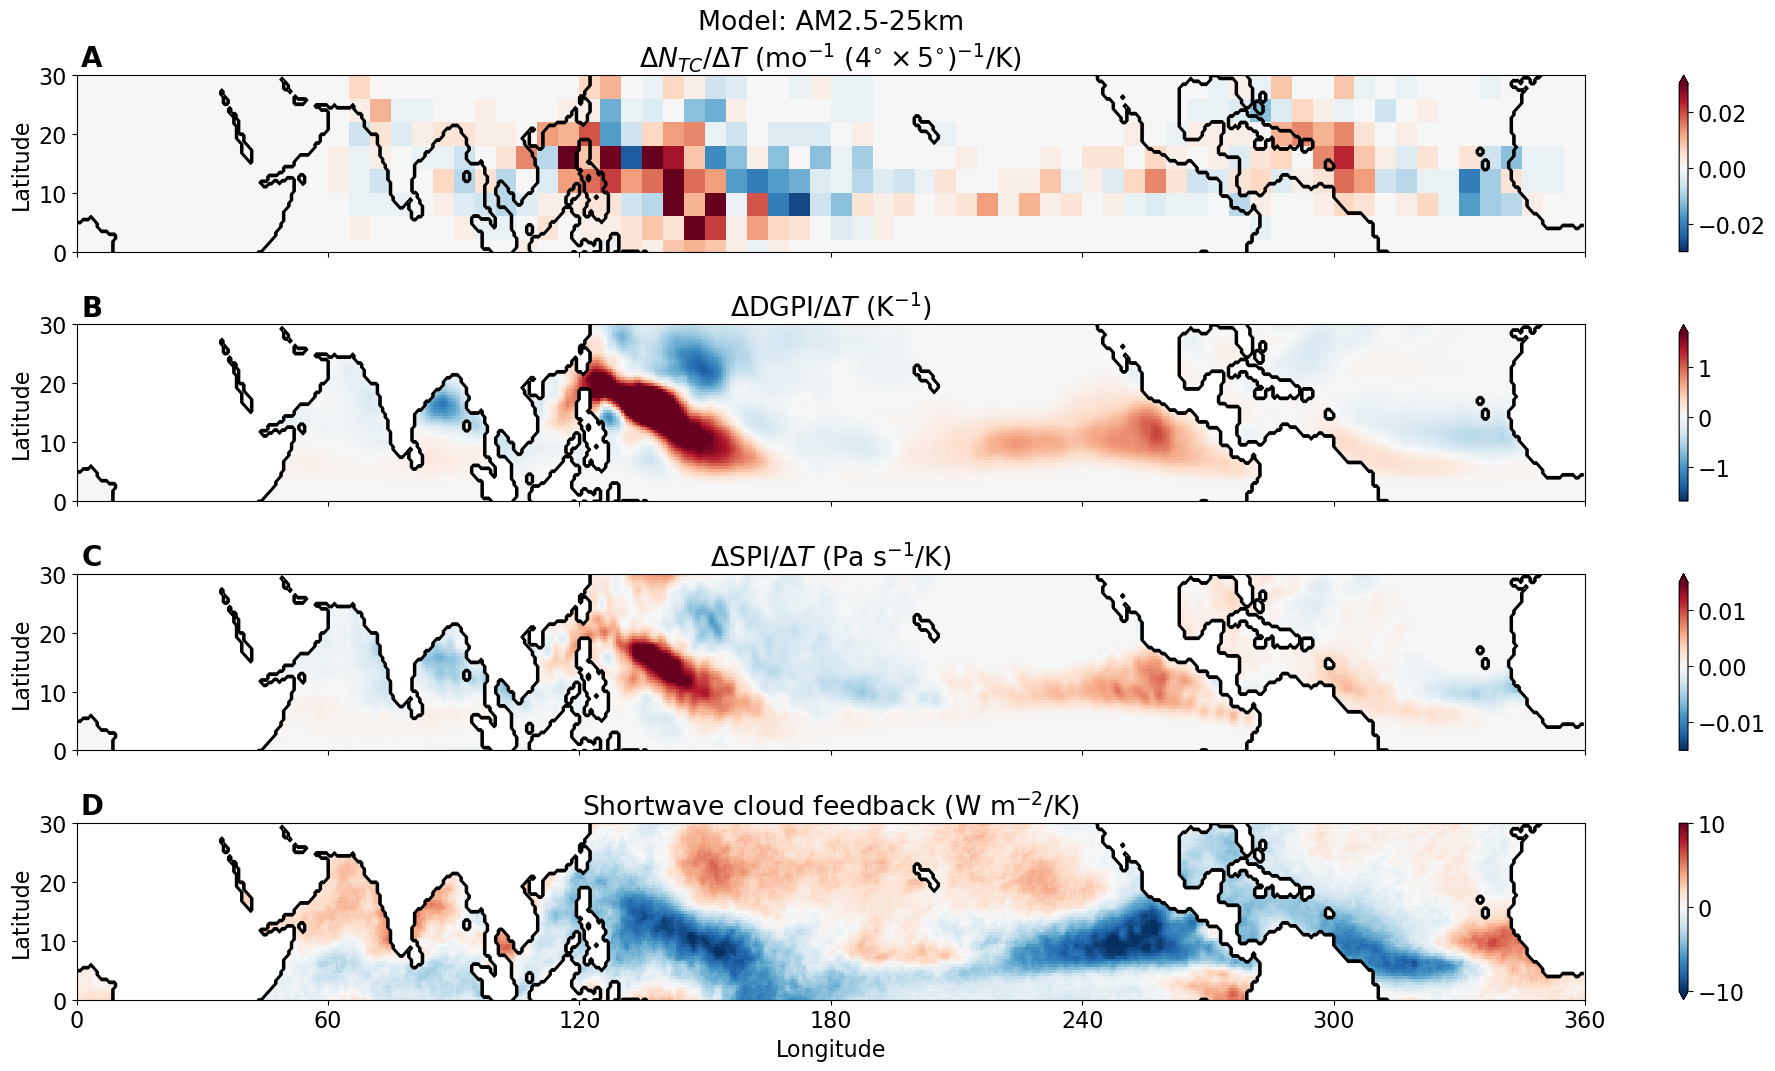

In [3]:
## plot maps
hfac = 8

# model = 'HiRAM'
# model = 'AM2.5C180'
model = 'AM2.5C360'

ds = xr.open_dataset(f'data/maps_{model}.nc')

if model == 'HiRAM':
    v1 = 0.04
    v15 = 0.008
    v2 = 10
elif model == 'AM2.5C360':
    v1 = 0.03
    v15 = 0.015
    v2 = 10
else:
    v1 = 0.06
    v15 = 0.015
    v2 = 20

dT = 2

fig, ax = plt.subplots(4, 1, figsize=(20, 11), sharex=True, facecolor='w')

(coarse_grain(ds['NTC'], factor=hfac)*hfac**2/dT).plot(ax=ax[0], cbar_kwargs={'label':''}, vmax=v1)
(ds['DGPI']/dT).plot(ax=ax[1], cbar_kwargs={'label':''}, vmax=v2/6)
(ds['SPI']/dT).plot(ax=ax[2], cbar_kwargs={'label':''}, vmax=v15)
(ds['SW']/dT).plot(ax=ax[3], cbar_kwargs={'label':''}, vmax=v2)

for a in ax:
    land.plot.contour(ax=a, colors='k', linewidths=1) # coastlines
    a.set_xlabel('')
    a.set_ylabel('Latitude')
    a.set_xticks(range(0, 360+1, 60))
    a.set_ylim((0, 30))

ax[0].set_title('Model: '+modellabels[model]+'\n'\
                +r'$\Delta N_{TC}/\Delta T$ (mo$^{-1}$ $(4^{\circ} \times 5^{\circ})^{-1}$/K)')
ax[1].set_title(r'$\Delta$DGPI/$\Delta T$ (K$^{-1}$)')
ax[2].set_title(r'$\Delta$SPI/$\Delta T$ (Pa s$^{-1}$/K)')
ax[3].set_title(r'Shortwave cloud feedback (W m$^{-2}$/K)')
ax[3].set_xlabel('Longitude')

for i in range(len(ax)):
    plt.sca(ax[i])
    plt.text(0.01, 1.05, f'{chr(ord("A")+i)}', transform=plt.gca().transAxes, weight='bold', fontsize=20, horizontalalignment='center')

plt.tight_layout()

# if model == 'AM2.5C360':
#     plt.savefig('Fig3.pdf', bbox_inches='tight')
# elif model == 'HiRAM':
#     plt.savefig('FigS1.pdf', bbox_inches='tight')
# else:
#     plt.savefig('FigS2.pdf', bbox_inches='tight')